In [24]:
import wr_score_util as wu 
import datetime
import numpy as np
import cv2
from tqdm import tqdm
from google.genai import types
from google import genai
import os
import pandas as pd
import re
from time import sleep
import imageio.v3 as iio
import typing 
from pydantic import BaseModel, Field
from typing import List, Literal
import json
import os


In [25]:
temperature = 0
top_p = 0.9
'''
a1 = 'Tell me if the mouse suceeded in drinking the water drop (answer with yes or no only)'
a2 = 'Did the waterdrop stick on the spout after being delivered before the mouse touched it (answer yes or no)?'
a3 = 'Did the mouse drop or splashed some of the water during this process? (yes or no only)'
a4 = 'Did the mouse extend its paws close to the water spout (yes, or no)'
a5 = 'Estimate the percentage of the water drop the mouse drank (percentage)'
a6 = 'Provide the timing of what events occured during the video in the following format( Time start - Time end: Event)'
'''
ycrop = (0,740)
xcrop = (210,930)
fps = 54
start = 1.25
end = 4
temp_path = 'temp.mp4'
def_args= dict(min_dist=2, max_dist=4, resize_factor=1, num_workers=12)

sys_instruc =("System instruction: You are a precise video analyst. You will carefully observe the shape, size, and surface area of a visible water drop on parafilm."
              "You will be shown a video of a water drop placed on parafilm. During the video, part of the water drop is pipetted away, reducing its size. Identify the water drop throughout the video."
              "Estimate the percentage of the original water volume that was pipetted away.Base your estimate on visible drop size (footprint area, height, curvature, and relative dimensions)."
              "Assume the shape of the drop remains similar (surface tension-dominated). Ignore reflections, shadows, and lighting artifacts.Report your answer ONLY as: Percentage of water removed: XX%")


a1 = "Determine how much water is removed (%) in this video"




api_key = '' #Enter api-key here, acquire api_key at google ai studio
MODEL_ID="gemini-2.5-pro" 


config=types.GenerateContentConfig(
    system_instruction = sys_instruc,temperature=temperature,top_p=top_p)


'''
config=types.GenerateContentConfig(
    system_instruction = sys_instruc)
'''
save_path = '/mnt/team/TM_Lab/Tony/wr_new/data_used/tta_gcamp8s/gemini_predictions'


In [26]:
client = genai.Client(api_key=api_key)

In [41]:
per_100 = '/home/tony/Downloads/100%'
per_100s = [os.path.join(per_100,i) for i in os.listdir(per_100)]
per_75 = '/home/tony/Downloads/75%'
per_75s = [os.path.join(per_75,i) for i in os.listdir(per_75)]
per_50 = '/home/tony/Downloads/50%'
per_50s = [os.path.join(per_50,i) for i in os.listdir(per_50)]
per_25 = '/home/tony/Downloads/25％'
per_25s = [os.path.join(per_25,i) for i in os.listdir(per_25)]
per_0 = '/home/tony/Downloads/0%'
per_0s = [os.path.join(per_0,i) for i in os.listdir(per_0)]
per_a25 = '/home/tony/Downloads/+25%'
per_a25s = [os.path.join(per_a25,i) for i in os.listdir(per_a25)]

In [42]:
import pandas as pd
from time import sleep
from tqdm import tqdm

results_df = pd.DataFrame(columns=["filename", "groundtruth", "result"])

for p in tqdm(per_a25s, desc="Processing videos", unit="video"):
    print(f"\n▶ Starting file: {p}")
    groundtruth = -25

    # Upload
    try:
        video_file = client.files.upload(file=p)
        print("✅ Upload complete:", video_file.name)
    except Exception as e:
        print("❌ Upload failed:", e)
        continue

    # Wait until file finishes processing
    try:
        print("⏳ Waiting for processing...")
        count = 0
        while video_file.state.name == "PROCESSING":
            sleep(1)
            count += 1
            if count % 5 == 0:
                print(f"   still processing... {count}s elapsed")
            video_file = client.files.get(name=video_file.name)
        print("✅ Processing done:", video_file.state.name)
    except Exception as e:
        print("❌ Error while waiting for processing:", e)
        continue

    # Generate response
    try:
        print("🧠 Generating model response...")
        response = client.models.generate_content(
            model=f"models/{MODEL_ID}",
            contents=[video_file, a1],
            config=config
        )
        print("✅ Model response received.")
    except Exception as e:
        print("❌ Model generation failed:", e)
        continue

    # Clean up uploaded file
    try:
        client.files.delete(name=video_file.name)
        print("🗑️ File deleted from server.")
    except Exception as e:
        print("⚠️ File deletion failed:", e)

    # Extract and store result
    test = str(getattr(response, "text", "NO RESPONSE"))
    test = str(getattr(response, "text", "NO RESPONSE"))
    results_df.loc[len(results_df)] = [p, groundtruth, test]
    print("📄 Added result row.")


Processing videos:   0%|          | 0/5 [00:00<?, ?video/s]


▶ Starting file: /home/tony/Downloads/+25%/20251027_162509.mp4
✅ Upload complete: files/qe07k9xrkufv
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  20%|██        | 1/5 [00:31<02:07, 31.93s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/+25%/20251027_162522.mp4
✅ Upload complete: files/egldmlwcz5hi
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  40%|████      | 2/5 [00:52<01:16, 25.34s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/+25%/20251027_162454.mp4
✅ Upload complete: files/qpcxj7ysbfzk
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  60%|██████    | 3/5 [01:26<00:58, 29.03s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/+25%/20251027_162536.mp4
✅ Upload complete: files/2t88rnxpjbf2
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  80%|████████  | 4/5 [01:59<00:30, 30.63s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/+25%/20251027_162549.mp4
✅ Upload complete: files/p92wtewe15da
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos: 100%|██████████| 5/5 [02:25<00:00, 29.16s/video]

🗑️ File deleted from server.
📄 Added result row.


In [43]:
results_df.to_csv('removed_meausred_a25.csv')

In [44]:
import pandas as pd
from time import sleep
from tqdm import tqdm

results_df = pd.DataFrame(columns=["filename", "groundtruth", "result"])

for p in tqdm(per_0s, desc="Processing videos", unit="video"):
    print(f"\n▶ Starting file: {p}")
    groundtruth = 0

    # Upload
    try:
        video_file = client.files.upload(file=p)
        print("✅ Upload complete:", video_file.name)
    except Exception as e:
        print("❌ Upload failed:", e)
        continue

    # Wait until file finishes processing
    try:
        print("⏳ Waiting for processing...")
        count = 0
        while video_file.state.name == "PROCESSING":
            sleep(1)
            count += 1
            if count % 5 == 0:
                print(f"   still processing... {count}s elapsed")
            video_file = client.files.get(name=video_file.name)
        print("✅ Processing done:", video_file.state.name)
    except Exception as e:
        print("❌ Error while waiting for processing:", e)
        continue

    # Generate response
    try:
        print("🧠 Generating model response...")
        response = client.models.generate_content(
            model=f"models/{MODEL_ID}",
            contents=[video_file, a1],
            config=config
        )
        print("✅ Model response received.")
    except Exception as e:
        print("❌ Model generation failed:", e)
        continue

    # Clean up uploaded file
    try:
        client.files.delete(name=video_file.name)
        print("🗑️ File deleted from server.")
    except Exception as e:
        print("⚠️ File deletion failed:", e)

    # Extract and store result
    test = str(getattr(response, "text", "NO RESPONSE"))
    test = str(getattr(response, "text", "NO RESPONSE"))
    results_df.loc[len(results_df)] = [p, groundtruth, test]
    print("📄 Added result row.")


Processing videos:   0%|          | 0/5 [00:00<?, ?video/s]


▶ Starting file: /home/tony/Downloads/0%/20251027_162315.mp4
✅ Upload complete: files/2u69j0d9wgo0
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  20%|██        | 1/5 [00:23<01:35, 23.93s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/0%/20251027_162307.mp4
✅ Upload complete: files/jk4kaja7k1d8
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  40%|████      | 2/5 [00:50<01:17, 25.75s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/0%/20251027_162250.mp4
✅ Upload complete: files/linxls5ufnsz
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  60%|██████    | 3/5 [01:16<00:51, 25.83s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/0%/20251027_162323.mp4
✅ Upload complete: files/8qgwlpkx69j8
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  80%|████████  | 4/5 [01:39<00:24, 24.53s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/0%/20251027_162300.mp4
✅ Upload complete: files/pfly3b0dhotk
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos: 100%|██████████| 5/5 [02:12<00:00, 26.54s/video]

🗑️ File deleted from server.
📄 Added result row.


In [45]:
results_df.to_csv('removed_meausred_0.csv')

In [30]:
import pandas as pd
from time import sleep
from tqdm import tqdm

results_df = pd.DataFrame(columns=["filename", "groundtruth", "result"])

for p in tqdm(per_100s, desc="Processing videos", unit="video"):
    print(f"\n▶ Starting file: {p}")
    groundtruth = 100

    # Upload
    try:
        video_file = client.files.upload(file=p)
        print("✅ Upload complete:", video_file.name)
    except Exception as e:
        print("❌ Upload failed:", e)
        continue

    # Wait until file finishes processing
    try:
        print("⏳ Waiting for processing...")
        count = 0
        while video_file.state.name == "PROCESSING":
            sleep(1)
            count += 1
            if count % 5 == 0:
                print(f"   still processing... {count}s elapsed")
            video_file = client.files.get(name=video_file.name)
        print("✅ Processing done:", video_file.state.name)
    except Exception as e:
        print("❌ Error while waiting for processing:", e)
        continue

    # Generate response
    try:
        print("🧠 Generating model response...")
        response = client.models.generate_content(
            model=f"models/{MODEL_ID}",
            contents=[video_file, a1],
            config=config
        )
        print("✅ Model response received.")
    except Exception as e:
        print("❌ Model generation failed:", e)
        continue

    # Clean up uploaded file
    try:
        client.files.delete(name=video_file.name)
        print("🗑️ File deleted from server.")
    except Exception as e:
        print("⚠️ File deletion failed:", e)

    # Extract and store result
    test = str(getattr(response, "text", "NO RESPONSE"))
    test = str(getattr(response, "text", "NO RESPONSE"))
    results_df.loc[len(results_df)] = [p, groundtruth, test]
    print("📄 Added result row.")


Processing videos:   0%|          | 0/5 [00:00<?, ?video/s]


▶ Starting file: /home/tony/Downloads/100%/20251027_141612.mp4
✅ Upload complete: files/z8qunm4hw4dn
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  20%|██        | 1/5 [00:19<01:18, 19.71s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/100%/20251027_141558.mp4
✅ Upload complete: files/t9guvyo0u8cl
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  40%|████      | 2/5 [00:31<00:45, 15.21s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/100%/20251027_141545.mp4
✅ Upload complete: files/tbf99jf1sd8u
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  60%|██████    | 3/5 [01:07<00:48, 24.42s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/100%/20251027_141629.mp4
✅ Upload complete: files/34fj6wzqbkn8
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  80%|████████  | 4/5 [01:30<00:23, 23.85s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/100%/20251027_141643.mp4
✅ Upload complete: files/tunl0s21olx5
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos: 100%|██████████| 5/5 [01:57<00:00, 23.49s/video]

🗑️ File deleted from server.
📄 Added result row.


In [33]:
results_df.to_csv('removed_meausred_100.csv')

In [34]:
import pandas as pd
from time import sleep
from tqdm import tqdm

results_df = pd.DataFrame(columns=["filename", "groundtruth", "result"])

for p in tqdm(per_75s, desc="Processing videos", unit="video"):
    print(f"\n▶ Starting file: {p}")
    groundtruth = 75

    # Upload
    try:
        video_file = client.files.upload(file=p)
        print("✅ Upload complete:", video_file.name)
    except Exception as e:
        print("❌ Upload failed:", e)
        continue

    # Wait until file finishes processing
    try:
        print("⏳ Waiting for processing...")
        count = 0
        while video_file.state.name == "PROCESSING":
            sleep(1)
            count += 1
            if count % 5 == 0:
                print(f"   still processing... {count}s elapsed")
            video_file = client.files.get(name=video_file.name)
        print("✅ Processing done:", video_file.state.name)
    except Exception as e:
        print("❌ Error while waiting for processing:", e)
        continue

    # Generate response
    try:
        print("🧠 Generating model response...")
        response = client.models.generate_content(
            model=f"models/{MODEL_ID}",
            contents=[video_file, a1],
            config=config
        )
        print("✅ Model response received.")
    except Exception as e:
        print("❌ Model generation failed:", e)
        continue

    # Clean up uploaded file
    try:
        client.files.delete(name=video_file.name)
        print("🗑️ File deleted from server.")
    except Exception as e:
        print("⚠️ File deletion failed:", e)

    # Extract and store result
    test = str(getattr(response, "text", "NO RESPONSE"))
    test = str(getattr(response, "text", "NO RESPONSE"))
    results_df.loc[len(results_df)] = [p, groundtruth, test]
    print("📄 Added result row.")


Processing videos:   0%|          | 0/5 [00:00<?, ?video/s]


▶ Starting file: /home/tony/Downloads/75%/20251027_141504.mp4
✅ Upload complete: files/mfot28hoik7y
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  20%|██        | 1/5 [00:27<01:49, 27.43s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/75%/20251027_141433.mp4
✅ Upload complete: files/6u881tbfd7v8
⏳ Waiting for processing...
   still processing... 5s elapsed
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  40%|████      | 2/5 [01:06<01:43, 34.48s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/75%/20251027_141409.mp4
✅ Upload complete: files/ha2a2476xt16
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  60%|██████    | 3/5 [01:35<01:03, 31.78s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/75%/20251027_141422.mp4
✅ Upload complete: files/nqtvbyxnf1r6
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  80%|████████  | 4/5 [01:58<00:28, 28.20s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/75%/20251027_141451.mp4
✅ Upload complete: files/a5lutgr6xuty
⏳ Waiting for processing...
   still processing... 5s elapsed
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos: 100%|██████████| 5/5 [02:31<00:00, 30.30s/video]

🗑️ File deleted from server.
📄 Added result row.


In [35]:
results_df.to_csv('removed_meausred_75.csv')

In [36]:
import pandas as pd
from time import sleep
from tqdm import tqdm

results_df = pd.DataFrame(columns=["filename", "groundtruth", "result"])

for p in tqdm(per_50s, desc="Processing videos", unit="video"):
    print(f"\n▶ Starting file: {p}")
    groundtruth = 50

    # Upload
    try:
        video_file = client.files.upload(file=p)
        print("✅ Upload complete:", video_file.name)
    except Exception as e:
        print("❌ Upload failed:", e)
        continue

    # Wait until file finishes processing
    try:
        print("⏳ Waiting for processing...")
        count = 0
        while video_file.state.name == "PROCESSING":
            sleep(1)
            count += 1
            if count % 5 == 0:
                print(f"   still processing... {count}s elapsed")
            video_file = client.files.get(name=video_file.name)
        print("✅ Processing done:", video_file.state.name)
    except Exception as e:
        print("❌ Error while waiting for processing:", e)
        continue

    # Generate response
    try:
        print("🧠 Generating model response...")
        response = client.models.generate_content(
            model=f"models/{MODEL_ID}",
            contents=[video_file, a1],
            config=config
        )
        print("✅ Model response received.")
    except Exception as e:
        print("❌ Model generation failed:", e)
        continue

    # Clean up uploaded file
    try:
        client.files.delete(name=video_file.name)
        print("🗑️ File deleted from server.")
    except Exception as e:
        print("⚠️ File deletion failed:", e)

    # Extract and store result
    test = str(getattr(response, "text", "NO RESPONSE"))
    test = str(getattr(response, "text", "NO RESPONSE"))
    results_df.loc[len(results_df)] = [p, groundtruth, test]
    print("📄 Added result row.")


Processing videos:   0%|          | 0/5 [00:00<?, ?video/s]


▶ Starting file: /home/tony/Downloads/50%/20251027_141151.mp4
✅ Upload complete: files/poam4vw4qhb7
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  20%|██        | 1/5 [00:25<01:40, 25.13s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/50%/20251027_141203.mp4
✅ Upload complete: files/538aifr33k6z
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  40%|████      | 2/5 [00:56<01:25, 28.56s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/50%/20251027_141244.mp4
✅ Upload complete: files/k2hwmkhg1pi1
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  60%|██████    | 3/5 [01:31<01:03, 31.65s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/50%/20251027_141309.mp4
✅ Upload complete: files/ucpqgtj8rxhg
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  80%|████████  | 4/5 [02:04<00:32, 32.03s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/50%/20251027_141257.mp4
✅ Upload complete: files/hsejzop2a3mr
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos: 100%|██████████| 5/5 [02:34<00:00, 30.82s/video]

🗑️ File deleted from server.
📄 Added result row.


In [37]:
results_df.to_csv('removed_meausred_50.csv')

In [38]:
import pandas as pd
from time import sleep
from tqdm import tqdm

results_df = pd.DataFrame(columns=["filename", "groundtruth", "result"])

for p in tqdm(per_25s, desc="Processing videos", unit="video"):
    print(f"\n▶ Starting file: {p}")
    groundtruth = 25

    # Upload
    try:
        video_file = client.files.upload(file=p)
        print("✅ Upload complete:", video_file.name)
    except Exception as e:
        print("❌ Upload failed:", e)
        continue

    # Wait until file finishes processing
    try:
        print("⏳ Waiting for processing...")
        count = 0
        while video_file.state.name == "PROCESSING":
            sleep(1)
            count += 1
            if count % 5 == 0:
                print(f"   still processing... {count}s elapsed")
            video_file = client.files.get(name=video_file.name)
        print("✅ Processing done:", video_file.state.name)
    except Exception as e:
        print("❌ Error while waiting for processing:", e)
        continue

    # Generate response
    try:
        print("🧠 Generating model response...")
        response = client.models.generate_content(
            model=f"models/{MODEL_ID}",
            contents=[video_file, a1],
            config=config
        )
        print("✅ Model response received.")
    except Exception as e:
        print("❌ Model generation failed:", e)
        continue

    # Clean up uploaded file
    try:
        client.files.delete(name=video_file.name)
        print("🗑️ File deleted from server.")
    except Exception as e:
        print("⚠️ File deletion failed:", e)

    # Extract and store result
    test = str(getattr(response, "text", "NO RESPONSE"))
    test = str(getattr(response, "text", "NO RESPONSE"))
    results_df.loc[len(results_df)] = [p, groundtruth, test]
    print("📄 Added result row.")


Processing videos:   0%|          | 0/5 [00:00<?, ?video/s]


▶ Starting file: /home/tony/Downloads/25％/20251027_140904.mp4
✅ Upload complete: files/8igjuk0x0vd5
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  20%|██        | 1/5 [00:28<01:55, 28.81s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/25％/20251027_140839.mp4
✅ Upload complete: files/ll1m1z64fcsr
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  40%|████      | 2/5 [00:51<01:16, 25.40s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/25％/20251027_140852.mp4
✅ Upload complete: files/cq3su2moxx2e
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  60%|██████    | 3/5 [01:19<00:53, 26.57s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/25％/20251027_140942.mp4
✅ Upload complete: files/u7a5kifmdrkg
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos:  80%|████████  | 4/5 [02:01<00:32, 32.60s/video]

🗑️ File deleted from server.
📄 Added result row.

▶ Starting file: /home/tony/Downloads/25％/20251027_140919.mp4
✅ Upload complete: files/h5xco6lslzrn
⏳ Waiting for processing...
✅ Processing done: ACTIVE
🧠 Generating model response...
✅ Model response received.


Processing videos: 100%|██████████| 5/5 [02:24<00:00, 28.94s/video]

🗑️ File deleted from server.
📄 Added result row.


In [39]:
results_df.to_csv('removed_meausred_25.csv')

In [8]:
for path in folders:
    event_log = read_event(path)
    total  = event_log['outcome'].isna().sum()
    basename = os.path.basename(path)
    save_name = os.path.join(save_path,f"{basename}.csv")
    pbar=tqdm(total = total, desc=f"Processing trials in {basename}", leave=True,position=0)
    try:
        for idx, row in event_log.iterrows():
            if pd.isna(row['outcome']):
                try:
                    trial_path = os.path.join(path, f"Trial_{int(row['trial'])}")
                    #change to else thing
                    frames = wu.extract_vid2score(trial_path, start=start, end=end, xcrop=xcrop,ycrop=ycrop,fps=54, cam_use='brain')

                    #frames = resize_frames(frames, scale=0.7)
                    wu.write_video_opencv(frames, temp_path,fps=1)
                    video_file = client.files.upload(file=temp_path)
                    while video_file.state.name == "PROCESSING":
                    #print('.', end='')
                        sleep(1)
                        video_file = client.files.get(name=video_file.name)
                    response = client.models.generate_content(
                        model=f"models/{MODEL_ID}",
                        contents=[
                            video_file,
                            a1,
                            a2,
                            a3,
                            a4,
                            a5],
                        config=config,
                        )
                    client.files.delete(name=video_file.name)
                    event_log.loc[idx, 'raw_answers'] = str(response.text)

                    analysis: TrialAnalysis = response.parsed
                    answers = analysis.model_dump_json()
                    answers= json.loads(answers)
                    event_log.loc[idx, 'tongue_contact']=answers['tongue_contact']
                    event_log.loc[idx, 'water_drop_stable'] = answers["water_drop_stable"]
                    event_log.loc[idx, 'water_spilled'] = answers["water_spilled"]
                    event_log.loc[idx, 'outcome_classification'] = answers['outcome_classification']
                    event_log.loc[idx, 'justification'] = answers["justification"]                    
                    os.remove(temp_path)
                except Exception as e:
                    print('wrong trial check')
                    print(idx)
                    print(e)

                pbar.update(1)
                #import sys; sys.exit()
        event_log.to_csv(save_name, index=False)
        
    except Exception as e:
        print(f"Error occured at {basename}")
        print(e)
        event_log.to_csv(save_name, index=False)
    

Processing trials in FU_R2_2024-07-18_1:  87%|████████▋ | 48/55 [31:16<04:25, 37.90s/it][h264 @ 0x19920200] left block unavailable for requested intra mode
[h264 @ 0x19920200] error while decoding MB 0 14, bytestream 42698
Processing trials in FU_R2_2024-07-18_1: 100%|██████████| 55/55 [35:53<00:00, 40.51s/it]

In [22]:
save_path = '/mnt/team/TM_Lab/Tony/wr_new/data_used/tta_gcamp8s/gemini_predictions2'

folders = ['/mnt/team/TM_Lab/Tony/wr_new/data_used/tta_gcamp8s/cage_k_rig2/r3/K_R3_2025-02-21_1']
folders = [f for f in folders if f"{os.path.basename(f)}.csv" not in os.listdir(save_path)]

In [23]:
for path in folders:
    event_log = read_event(path)
    total  = event_log['outcome'].isna().sum()
    basename = os.path.basename(path)
    save_name = os.path.join(save_path,f"{basename}.csv")
    pbar=tqdm(total = total, desc=f"Processing trials in {basename}", leave=True,position=0)
    try:
        for idx, row in event_log.iterrows():
            if pd.isna(row['outcome']):
                try:
                    trial_path = os.path.join(path, f"Trial_{int(row['trial'])}")
                    #change to else thing
                    frames = wu.extract_vid2score(trial_path, start=start, end=end, xcrop=xcrop,ycrop=ycrop,fps=54, cam_use='B')
                    #import sys;sys.exit()
                    frames = adjust_brightness_contrast(frames,alpha = 3, beta = 35)
                    frames = resize_frames(frames, scale=0.7)
                    wu.write_video_opencv(frames, temp_path,fps=1)
                    video_file = client.files.upload(file=temp_path)
                    while video_file.state.name == "PROCESSING":
                    #print('.', end='')
                        sleep(1)
                        video_file = client.files.get(name=video_file.name)
                    response = client.models.generate_content(
                        model=f"models/{MODEL_ID}",
                        contents=[
                            video_file,
                            a1,
                            a2,
                            a3,
                            a4,
                            a5],
                        config=config,
                        )
                    client.files.delete(name=video_file.name)
                    event_log.loc[idx, 'raw_answers'] = str(response.text)

                    analysis: TrialAnalysis = response.parsed
                    answers = analysis.model_dump_json()
                    answers= json.loads(answers)
                    event_log.loc[idx, 'tongue_contact']=answers['tongue_contact']
                    event_log.loc[idx, 'water_drop_stable'] = answers["water_drop_stable"]
                    event_log.loc[idx, 'water_spilled'] = answers["water_spilled"]
                    event_log.loc[idx, 'outcome_classification'] = answers['outcome_classification']
                    event_log.loc[idx, 'justification'] = answers["justification"]                    
                    os.remove(temp_path)
                except Exception as e:
                    print('wrong trial check')
                    print(idx)
                    print(e)

                pbar.update(1)
                #import sys; sys.exit()
        event_log.to_csv(save_name, index=False)
        
    except Exception as e:
        print(f"Error occured at {basename}")
        print(e)
        event_log.to_csv(save_name, index=False)
    

Processing trials in K_R3_2025-02-21_1:   0%|          | 0/83 [14:31<?, ?it/s]


Processing trials in K_R3_2025-02-21_1:  96%|█████████▋| 80/83 [59:37<07:47, 155.76s/it]

wrong trial check
114
'NoneType' object has no attribute 'model_dump_json'


Processing trials in K_R3_2025-02-21_1: 100%|██████████| 83/83 [1:01:30<00:00, 78.27s/it] 

In [9]:
p= '/mnt/team/TM_Lab/Tony/wr_new/data_used/tta_gcamp8s/cage_k_rig2/r3/K_R3_2025-01-14_1/mnt/team/TM_Lab/Tony/wr_new/data_used/tta_gcamp8s/cage_k_rig2/r3/K_R3_2025-02-21_1/eventlog.tx'

In [8]:
frames.shape

(286, 740, 720, 3)

In [9]:
import matplotlib.pylab as plt

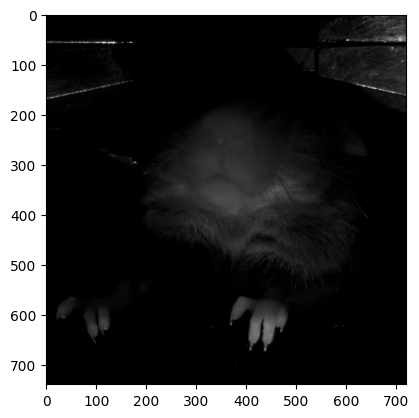

In [11]:
plt.imshow(frames[0,:,:,:])

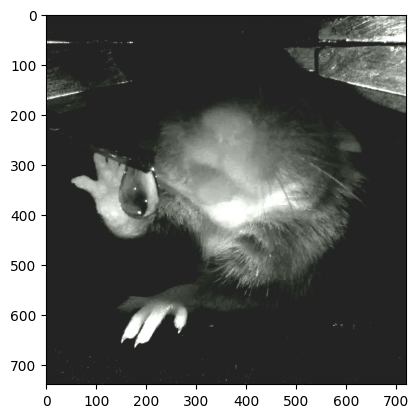

In [21]:
frames_n = adjust_brightness_contrast(frames,alpha = 3, beta = 35)
plt.imshow(frames_n[70,:,:,:])